<a href="https://colab.research.google.com/github/camilo-avendano1/Modelos2/blob/main/Sesi%C3%B3n_pr%C3%A1ctica_MLP_2023_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mariabda2/ML_2022/blob/main/clases/clase_16_Redes_Neuronales_Recurrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **REDES NEURONALES - PERCEPTRÓN MULTICAPA**
Comparación de métodos basados en árboles

In [1]:
#@title **Nombres y apellidos del estudiante**
Estudiante ='juan camilo avenda\xF1o rodriguez' #@param {type:"string"}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Este ejercicio tiene como objetivo implementar una red neuronal artificial de tipo perceptrón multicapa (MLP) para resolver un problema de regresión. Usaremos la librería sklearn. Consulte todo lo relacionado con la definición de hiperparámetros, los métodos para el entrenamiento y la predicción de nuevas muestras en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Para este ejercicio usaremos la base de datos sobre calidad del aire, abordando **un problema de múltiples salidas**.

In [5]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('/content/AirQuality.data',delimiter='\t')

#Esta es la base de datos AirQuality del UCI Machine Learning Repository. En la siguiente URL se encuentra toda
#la descripción de la base de datos y la contextualización del problema.
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

x = db[:,0:11]
y = db[:,11:13]

Para calcular los errores, vamos a explorar y usar el [módulo de métricas den sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

Podemos observar que el módulo tiene métricas para regresión y clasificación.

# **MLP para regresión**

Para porder implementar nuestra función, lo primero que debemos entender la estrucutra de la red.

Como mencionamos, vamos a solucionar un problema de multiples salidas. Estas salidas con valores continuos. Por lo tanto debemos garantizar que la capa de salida de nuestra red tenga la capacidad de modelar este tipo de datos.

Una característica de los modelos de sklearn, es que ciertos tipos de atributos, sólo pueden ser accedidos cuanto se entrena el modelo.
* `MLPRegressor` hace parte de `sklearn.neural_network`

In [6]:
# MLP A
mlp = MLPRegressor()
xrandom = np.random.rand(10,2)
yrandom = np.zeros(10)
mlp.fit(X=xrandom, y=yrandom)
print(mlp.activation)
print(mlp.out_activation_)

# MLP B
mlp = MLPRegressor(activation='logistic')
xrandom = np.random.rand(10,2)
yrandom = np.zeros(10)
mlp.fit(X=xrandom, y=yrandom)
print(mlp.activation)
print(mlp.out_activation_)

relu
identity
logistic
identity


Una vez entendido como sklearn usa las funciones de activación, vamos a crear la función para realizar los experimentos.

Vamos a completar la función con el código necesario para usar una red neuronal tipo MLP para solucionar el problema de regresión propuesto.
1. Como función de activación en las capas ocultas use la función 'tanh'.
2. Ajuste el número máximo de épocas a 300.
3. Dejamos como variables el número de capas ocultas y el número de neuronas por capa.
5. debemos seleccionar la función adecuada del [modulo de sklearn para calcular el Error Porcentual Absoluto Medio (MAPE en sigla en ingles)](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics). Tener en cuenta qué parámetros usar.
6. Debemos usar los nombres explícitos, por ejemplo si para el MLP es necesario usar el parámetro `activation`, debe ser llamado: `MLPRegressor(activation=...)`
7. Explorar qué hace la siguiente linea de código `tuple(2*[100])`

**NOTA**: observe el  parámetro `random_state=1` por favor conservarlo, ya que esto hace que los resultados sean similares a lo largo de las ejecuciones.
* `ShuffleSplit` hace parte de `sklearn.model_selection`
* `mean_absolute_error` hace parte de `sklearn.metrics`

In [8]:
# ejercicio de código
def experimetar_mlp(num_hidden_layers, num_neurons, X,Y):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar

    Retorna: dataframe con 6 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba variable 1 y desviación estandar
        - promedio de error prueba variable 2 y desviación estandar

    """
    #Validamos el modelo
    Folds = 3
    ss = ShuffleSplit(n_splits=Folds, test_size=0.2, random_state = 1)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(ss.split(X)):
                # para almacenar errores intermedios
                ErrorY1 = np.zeros(Folds)
                ErrorY2 = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train,:]
                Xtest = X[test,:]
                Ytest = Y[test,:]
                #Normalizamos los datos
                scaler = StandardScaler().fit(Xtrain)
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple([neurons] *hidden_layers)
                mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=300, activation='tanh', random_state=1)
                mlp.fit(Xtrain, Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                #Error absoluto medio para cada una de las dos salidas
                errors = mean_absolute_percentage_error(y_true=Ytest, y_pred =Yest, multioutput='raw_values')
                ErrorY1[j] = errors[0]
                ErrorY2[j] = errors[1]

            print('error para salida 1 = ' + str(np.mean(ErrorY1)) + '+-' + str(np.std(ErrorY1)))
            print('error para 2 = ' + str(np.mean(ErrorY2)) + '+-' + str(np.std(ErrorY2)))

            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons
            resultados.loc[idx,'error de prueba y1(media)'] = np.mean(ErrorY1)
            resultados.loc[idx,'intervalo de confianza y1'] = np.std(ErrorY1)
            resultados.loc[idx,'error de prueba y2(media)'] = np.mean(ErrorY2)
            resultados.loc[idx,'intervalo de confianza y2'] = np.std(ErrorY2)
            idx+=1
    return (resultados)

vamos a realizar los experimentos

In [9]:
# tarda unos minutos!!
resultados_mlpr = experimetar_mlp(num_hidden_layers = [1,2,3], num_neurons  = [8,12,16], X=x, Y=y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.05494029267410518+-0.07769730702046675
error para 2 = 2.3035489072078175+-3.257710106163018


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.04964198413271201+-0.0702043672235913
error para 2 = 2.288764714877964+-3.2368021008614063


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.03912619726226461+-0.05533279881237968
error para 2 = 1.1681283933502833+-1.651983016469064


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.041796589071809616+-0.05910930312628826
error para 2 = 1.5148277026141406+-2.1422898816953952


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.03952065247307942+-0.05589064272126271
error para 2 = 1.9538747891696895+-2.7631962260226466


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.03634624290885002+-0.05140134966300263
error para 2 = 1.6746353803181362+-2.368292066875734


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.06171514336384779+-0.08727839274895348
error para 2 = 2.2963026385629117+-3.247462334768793


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.037203616971060595+-0.052613859689807745
error para 2 = 1.930878587156086+-2.730674685251937


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


error para salida 1 = 0.03228489410762774+-0.04565773510678637
error para 2 = 1.333615535856589+-1.8860171777998507


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


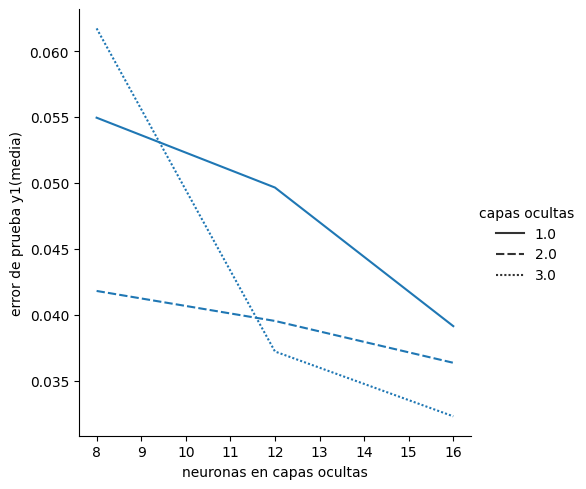

In [10]:
sns.relplot(data = resultados_mlpr,  x='neuronas en capas ocultas', y = 'error de prueba y1(media)', style= 'capas ocultas', kind = 'line')

In [11]:
#@title **Pregunta 1. Respuesta abierta**
#@markdown ¿Cuál es el problema de modelado abordado en el ejercicio MLP regresión?
respuesta_1 = "el modelo nos da de respuesta las variables de respuesta la temperatura y la humedad relativa" #@param {type:"string"}

In [12]:
#@title **Pregunta 2. Respuesta abierta**
#@markdown ¿Cómo influyen las capas ocultas en el resultado del modelo?
respuesta_2 = "mejora el modelo pero solo si se usan mas neuronas, si se usan pocas tiende a subir el error" #@param {type:"string"}

In [13]:
#@title **Pregunta 3. Respuesta abierta**
#@markdown ¿Cómo influyen el número de neuronas el resultado del modelo?
respuesta_3 = "el numero de neuronas tiene a mejorar siempre el modelo disminuyendo el error" #@param {type:"string"}

#**MLP para clasificación**

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

* `load_digits` hace parte de `sklearn.datasets`
* `PCA` hace parte de `sklearn.decomposition`

In [20]:
digits = load_digits(n_class=4)
#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
#---------- Datos a usar ----------------------
Xd = data
Yd = digits.target

como lo hicmos antes, vamos a comprobar con la libreria la función de activación
* `MLPClassifier` hace parte de `sklearn.neural_network`

In [21]:
# ejercicio de código
def output_activation_MPC():
    """funcion que entrena un modelo
    con data aleatoria para confirmar la funcion
    de activacion de la ultima capa
    """
    mlp = MLPClassifier()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp.fit(xrandom, yrandom)
    # retornar el atributo de mlp adecuado
    return mlp.out_activation_

In [22]:
print("la función de activación para un problema de clasificación es:", output_activation_MPC())

la función de activación para un problema de clasificación es: logistic


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ahora en nuestro siguiente ejercicio vamos a implementar una red neuronal artificial de tipo perceptrón multicapa (MLP) para resolver un problema de clasificación. Usaremos la librería sklearn. Consulte todo lo relacionado con la definición de hiperparámetros, los métodos para el entrenamiento y la predicción de nuevas muestras en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier


Vamos completar la función con el código necesario para usar una red neuronal tipo MLP para solucionar el problema de clasificación propuesto.
1. Como función de activación en las capas ocultas use la función tangencial hiperbólica.
2. Ajuste el número máximo de épocas a 350.
3. Dejamos como variables el número de capas ocultas y el número de neuronas por capa
5. Seleccione la función adecuada del [modulo de sklearn para calcular la exactitud del clasificador](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics). Tener en cuenta que parametros usar.
6. Debemos usar los nombres explicitos, por ejemplo si para el MLP es necesario usar el parametro `activation`, debe ser llamado: `MLPClassifier(activation=...)`

**NOTA**: cuando observe el el parametro `random_state=1` por favor conservarlo, ya que esto hace que los resultados sean similares a lo largo de las ejecucciones.
* `StratifiedKFold` hace parte de `sklearn.model_selection`
* `StandardScaler` hace parte de `sklearn.preprocessing`

In [24]:
# ejercicio de código
def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar

    Retorna: dataframe con 4 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba (exactitud/eficiencia) de claisficacion y desviación estandar
    """
    #Validamos el modelo
    Folds = 3
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(skf.split(X, Y)):
                # para almacenar errores intermedios
                Error = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                #Normalizamos los datos
                scaler = StandardScaler().fit(Xtrain)
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers*[neurons])
                mlp = MLPClassifier(activation= 'tanh',hidden_layer_sizes=hidden_layer_sizes, max_iter=350, random_state = 1)
                # entrenar el MLP
                mlp.fit(Xtrain,Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                # recordar usar la medida adecuada de acuerdo a las instrucciones
                Error[j] = accuracy_score(y_true = Ytest,  y_pred =Yest)


            print('error para configuracion de params = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))

            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons
            resultados.loc[idx,'error de prueba(media)'] = np.mean(Error)
            resultados.loc[idx,'intervalo de confianza'] = np.std(Error)
            idx+=1
    return (resultados)

In [25]:
# tarda unos minutos!!
resultados_mlpc = experimetar_mlpc(X = Xd, Y=Yd, num_hidden_layers=[1,2,3], num_neurons=[12,16,20])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


error para configuracion de params = 0.3055555555555555+-0.4321208107251124
error para configuracion de params = 0.30416666666666664+-0.43015662522181647
error para configuracion de params = 0.30416666666666664+-0.43015662522181647
error para configuracion de params = 0.3013888888888889+-0.42622825421522453
error para configuracion de params = 0.30833333333333335+-0.43604918173170437
error para configuracion de params = 0.30972222222222223+-0.4380133672350003
error para configuracion de params = 0.30416666666666664+-0.43015662522181647
error para configuracion de params = 0.2986111111111111+-0.4222998832086326
error para configuracion de params = 0.3069444444444444+-0.43408499622840835


In [26]:
resultados_mlpc

,capas ocultas,neuronas en capas ocultas,error de prueba(media),intervalo de confianza
0,1.0,12.0,0.305556,0.432121
1,1.0,16.0,0.304167,0.430157
2,1.0,20.0,0.304167,0.430157
3,2.0,12.0,0.301389,0.426228
4,2.0,16.0,0.308333,0.436049
5,2.0,20.0,0.309722,0.438013
6,3.0,12.0,0.304167,0.430157
7,3.0,16.0,0.298611,0.422300
8,3.0,20.0,0.306944,0.434085


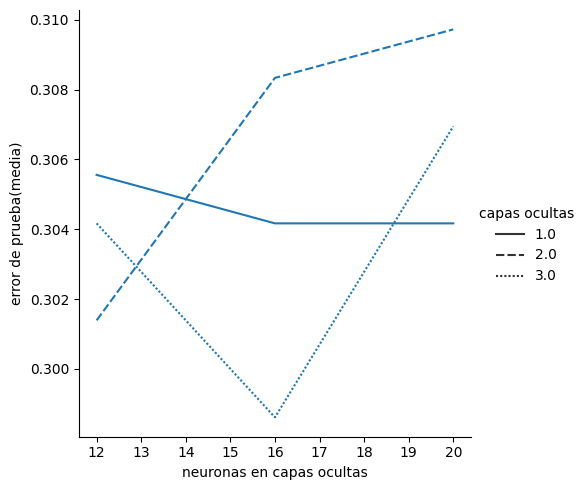

In [27]:
# ver los resultados
# notar como las capas ocultas y el # de neuronas influyen
sns.relplot(data = resultados_mlpc,  x='neuronas en capas ocultas', y = 'error de prueba(media)', style= 'capas ocultas', kind = 'line')

**recordatorio** En la practica sklearn no es una la libreria indicada para desarollar redes neuronales, para practicas mas avanzadas y realizar modelos en el "mundo real" [se deben usar conceptos de deep learning y una libreria llamada Keras](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb).

In [ ]:
#@title **Pregunta 4. Respuesta abierta**
#@markdown ¿Cuál es el problema de modelado abordado en el ejercicio MLP clasificación?
respuesta_4 = "busca clasificar los numeros en su categoria correspondiente" #@param {type:"string"}

In [ ]:
#@title **Pregunta 5. Respuesta abierta**
#@markdown ¿Cómo influyen las capas ocultas en el resultado del modelo?
respuesta_5 = "con el numero de capas cambia el error mejorando la metrica pero el numero de neuronas en cada capa dicta mas el cambio numero de neuronas" #@param {type:"string"}

In [28]:
#@title **Pregunta 6. Respuesta abierta**
#@markdown ¿Cómo influyen el número de neuronas el resultado del modelo?
respuesta_6 = "el numero de neuronas mejora el resultado de la capa 1 y 3 hasta 16 neuronas en el resto empeora el erro, pero  relativamente hablando es muy poco lo que cambia en el numero de capas y neuronas" #@param {type:"string"}